In [1]:
import numpy as np
import pandas as pd

file_enron = './datasets/enron-v1.csv'
enron_data = pd.read_csv(file_enron)
enron_data

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = [10, 5]  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

import plotly.graph_objects as go
import networkx as nx
from pyvis.network import Network
from pyvis import network as net

# Here is my additional stuff
import plotly.express as px
from bokeh.layouts import column, layout, row, Spacer
from bokeh.models import (BasicTicker, ColorBar, ColumnDataSource,
                          LinearColorMapper, PrintfTickFormatter, 
                          Label, ImageURL, RadioGroup, Button, Select,
                          Arrow, NormalHead, LabelSet)
from bokeh.plotting import figure, curdoc
from bokeh.transform import transform, linear_cmap

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
sent_data = enron_data.sort_values('sentiment')
sent_data['level'] = '.'
for i in range(len(sent_data)):
    val= sent_data.at[i,'sentiment']
        
    if val >= 0.5 :
        sent_data.at[i,'level'] = 'very good'

    if (val >= 0.1) & (val < 0.5):
        sent_data.at[i,'level'] = 'good'
         
    if (val < 0.1) & (val > -0.1) :
        sent_data.at[i,'level'] = 'neutral'
        
    if (val <= -0.1) & (val > -0.5):
        sent_data.at[i,'level'] = 'bad' 
    
    if val <= -0.5:
        sent_data.at[i,'level'] = 'very bad'

In [3]:
sent_data['from email, to email'] = sent_data['fromEmail'] + ';' + sent_data['toEmail']
sent_data['from job, to job'] = sent_data['fromJobtitle'] + ';' + sent_data['toJobtitle']

jah = enron_data['toEmail'].unique()
jah2 = enron_data['toJobtitle'].unique()
jah3 = enron_data['date'].unique()
jahh = tuple(jah) + tuple(jah2)

joblist = ['Trader', 'Unkown', 'Vice President', 'Employee', 'Managing Director', 'President', 'Manager', 'Director', 'CEO', 'In House Lawyer']


interactive(children=(Combobox(value='something;something', description='PeopleFilter'), Output()), _dom_class…

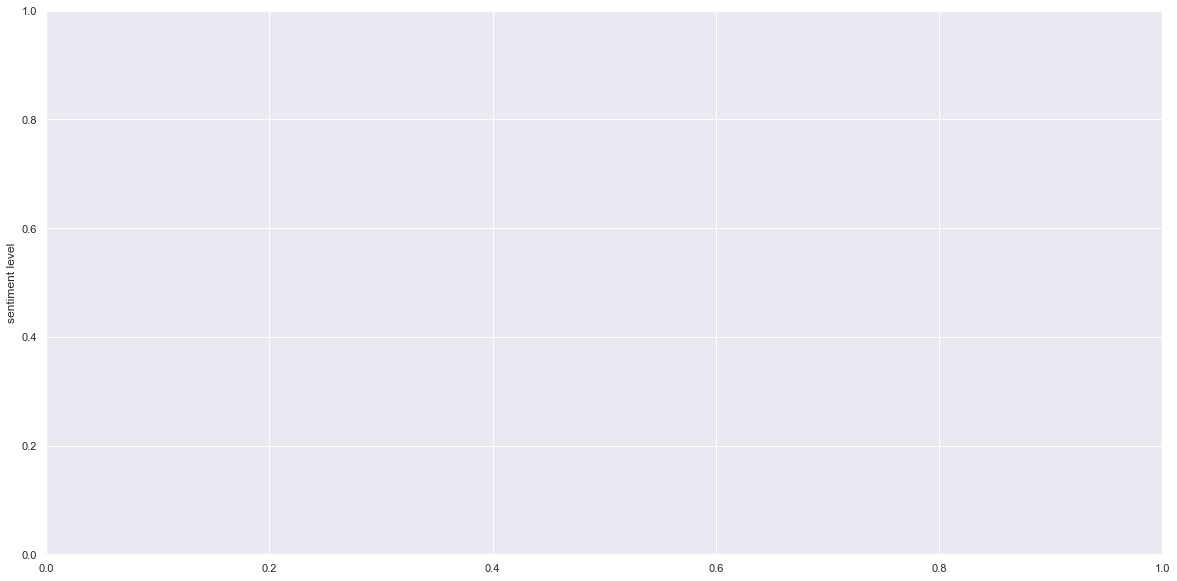

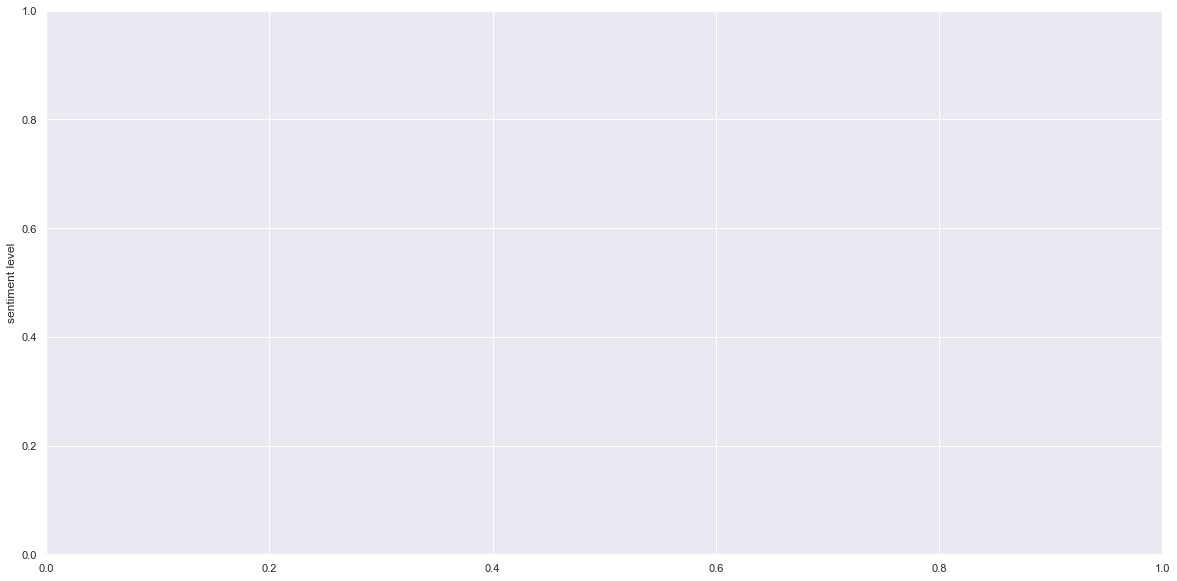

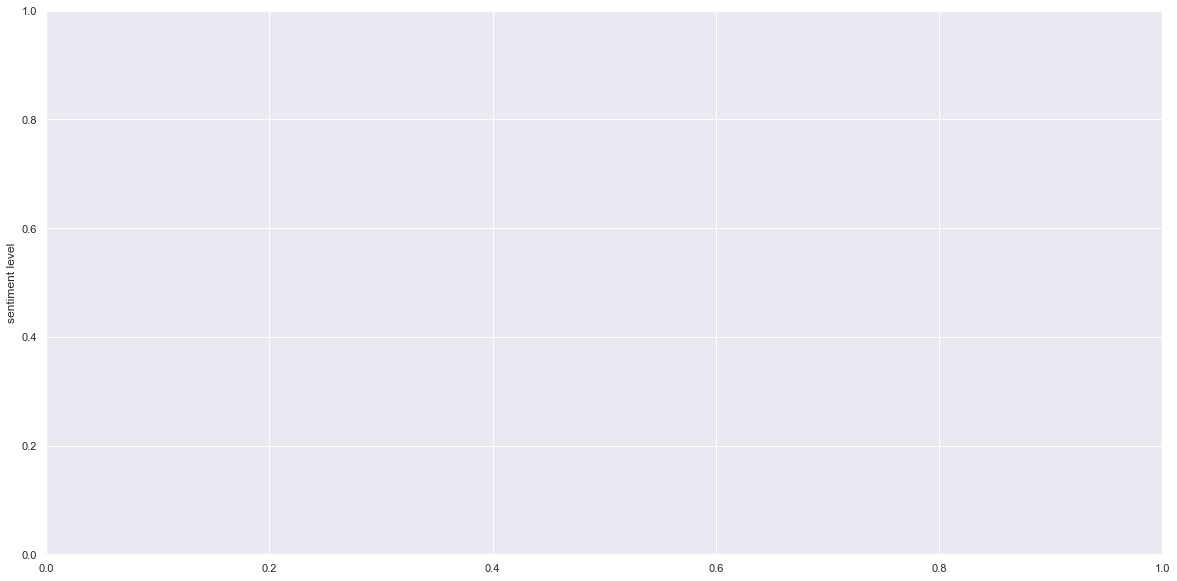

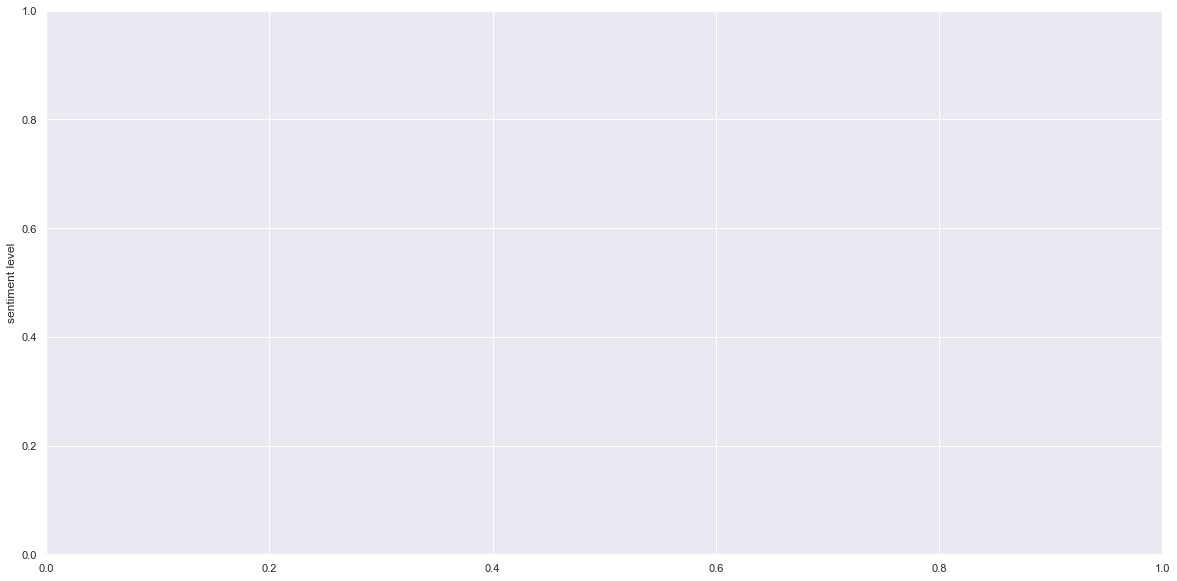

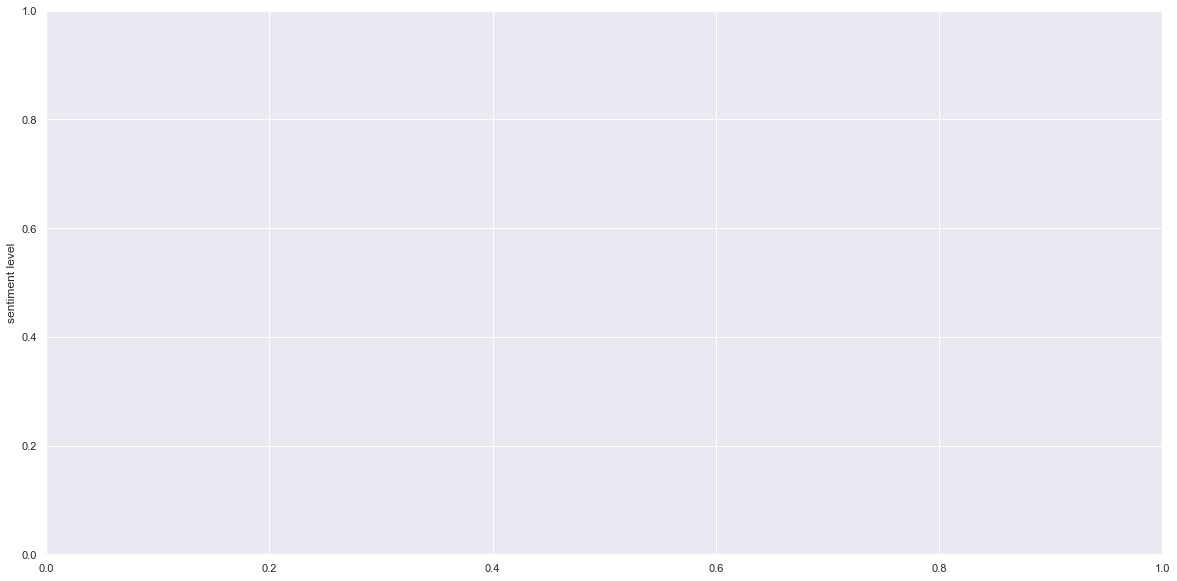

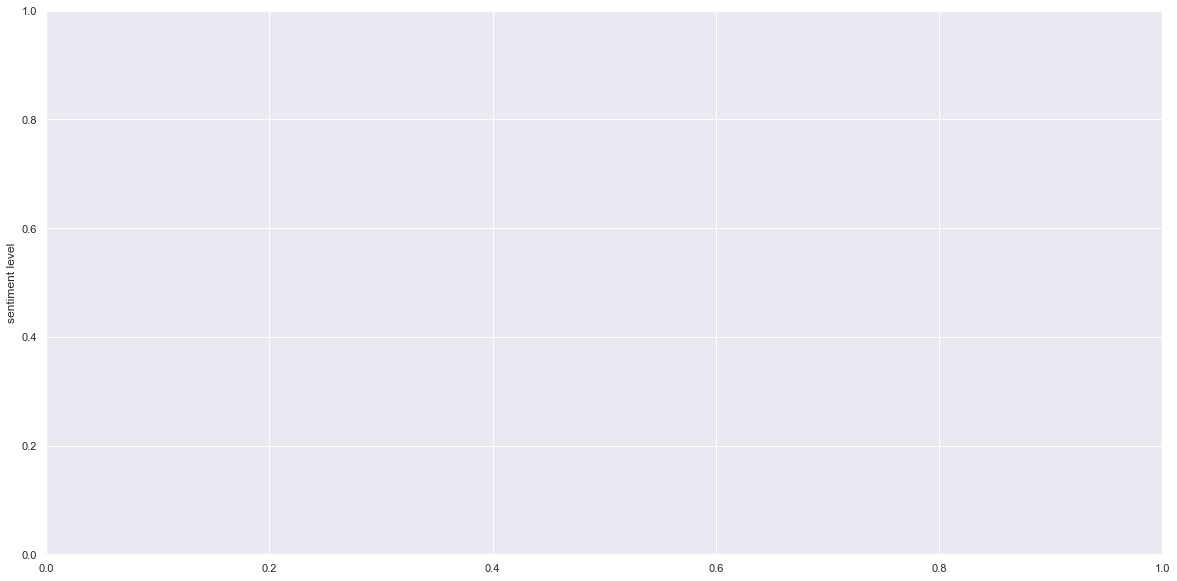

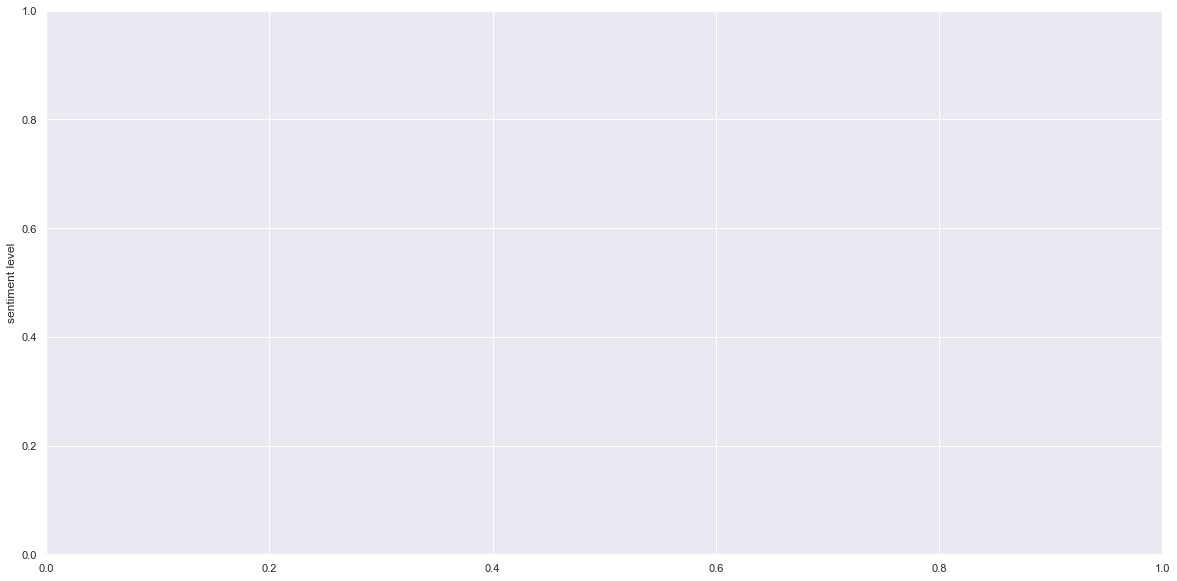

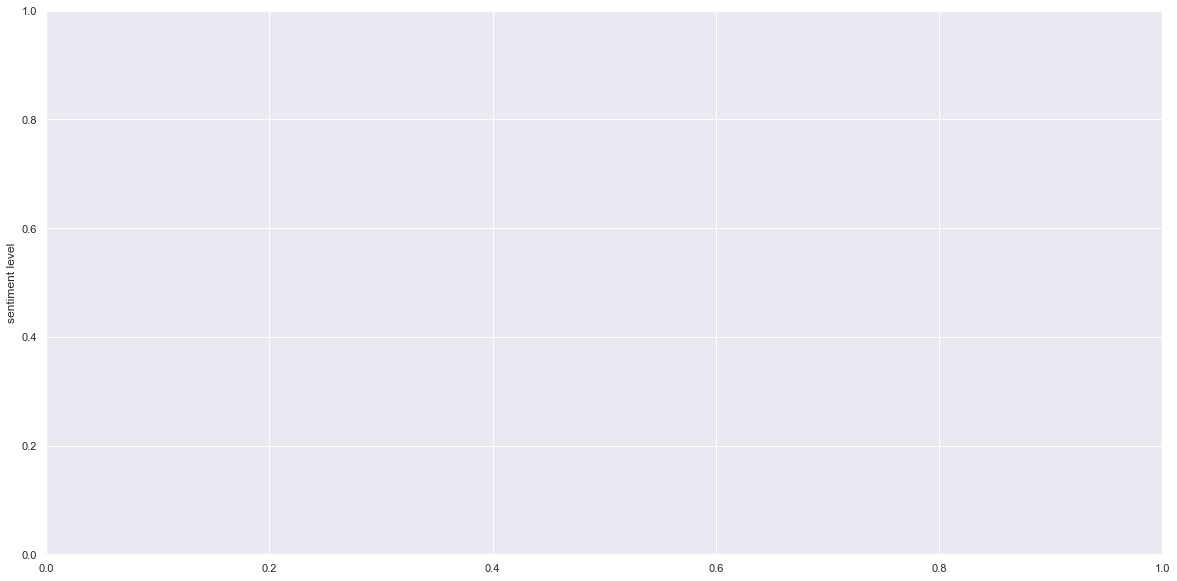

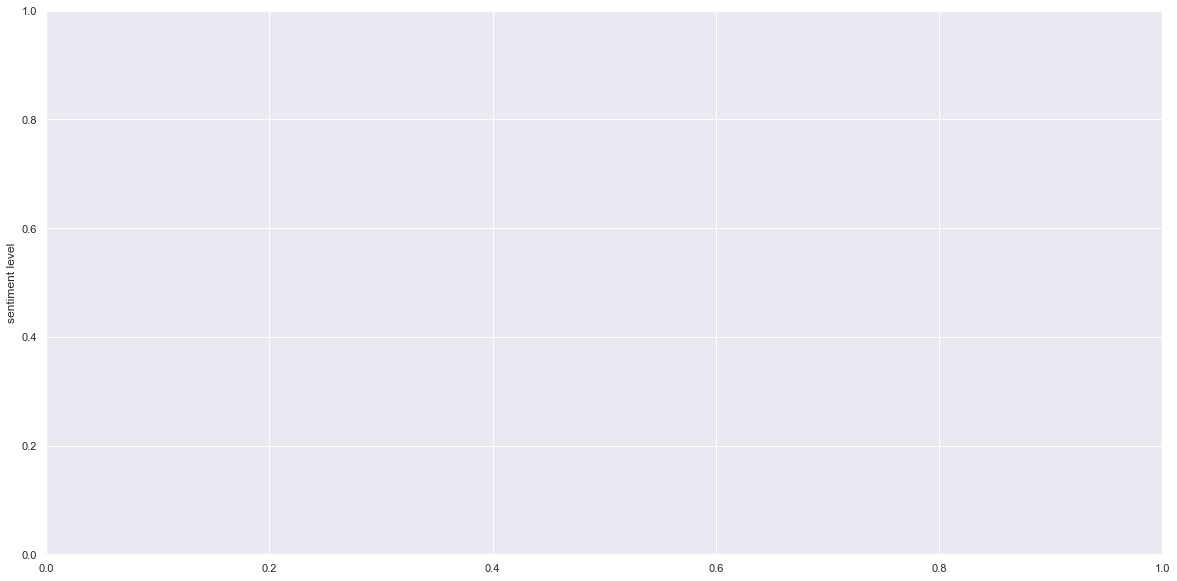

In [4]:

def f(PeopleFilter):
    
    global sent_matrix    
    sent_grouped = sent_data.groupby(["toJobtitle", "level"]).count()
    sent_grouped["count"] = sent_grouped["sentiment"]
    sent_matrix = sent_grouped["count"].unstack()
    sent_matrix = sent_matrix.fillna(0)
    
    if ";" in PeopleFilter:
        if (PeopleFilter.partition(";")[0] in joblist and PeopleFilter.partition(";")[2] in joblist):
            CertainMails = (sent_data['from job, to job'] == PeopleFilter)
            sent_data2 = sent_data[CertainMails].sort_values('sentiment')
            sent_grouped = sent_data2.groupby(["from job, to job", "level"]).count()
            sent_grouped["count"] = sent_grouped["sentiment"]
            sent_matrix = sent_grouped["count"].unstack()
        elif ("@" in PeopleFilter.partition(";")[0] and "@" in PeopleFilter.partition(";")[2]):
            CertainMails = (sent_data['from email, to email'] == PeopleFilter)
            sent_data2 = sent_data[CertainMails].sort_values('sentiment')
            sent_grouped = sent_data2.groupby(["from email, to email", "level"]).count()
            sent_grouped["count"] = sent_grouped["sentiment"]
            sent_matrix = sent_grouped["count"].unstack()
        elif (PeopleFilter.partition(";")[0] == 'to' and PeopleFilter.partition(";")[2] in joblist):
            CertainMails = (sent_data['toJobtitle'] == PeopleFilter.partition(";")[2])
            sent_data2 = sent_data[CertainMails].sort_values('sentiment')
            sent_grouped = sent_data2.groupby(["toJobtitle", "level"]).count()
            sent_grouped["count"] = sent_grouped["sentiment"]
            sent_matrix = sent_grouped["count"].unstack()
        elif (PeopleFilter.partition(";")[0] == 'from' and PeopleFilter.partition(";")[2] in joblist):
            CertainMails = (sent_data['fromJobtitle'] == PeopleFilter.partition(";")[2])
            sent_data2 = sent_data[CertainMails].sort_values('sentiment')
            sent_grouped = sent_data2.groupby(["fromJobtitle", "level"]).count()
            sent_grouped["count"] = sent_grouped["sentiment"]
            sent_matrix = sent_grouped["count"].unstack()
        elif (PeopleFilter.partition(";")[0] == 'to' and '@' in PeopleFilter.partition(";")[2]):
            CertainMails = (sent_data['toEmail'] == PeopleFilter.partition(";")[2])
            sent_data2 = sent_data[CertainMails].sort_values('sentiment')
            sent_grouped = sent_data2.groupby(["toEmail", "level"]).count()
            sent_grouped["count"] = sent_grouped["sentiment"]
            sent_matrix = sent_grouped["count"].unstack()
        elif (PeopleFilter.partition(";")[0] == 'from' and '@' in PeopleFilter.partition(";")[2]):
            CertainMails = (sent_data['fromEmail'] == PeopleFilter.partition(";")[2])
            sent_data2 = sent_data[CertainMails].sort_values('sentiment')
            sent_grouped = sent_data2.groupby(["fromEmail", "level"]).count()
            sent_grouped["count"] = sent_grouped["sentiment"]
            sent_matrix = sent_grouped["count"].unstack()

    elif ";" not in PeopleFilter:
        if "@" in PeopleFilter:
            CertainMails = ((sent_data['fromEmail'] == PeopleFilter) | (sent_data['toEmail'] == PeopleFilter))
            sent_data2 = sent_data[CertainMails].sort_values('sentiment')
            sent_grouped = sent_data2.groupby(["from email, to email", "level"]).count()
            sent_grouped["count"] = sent_grouped["sentiment"]
            sent_matrix = sent_grouped["count"].unstack()
        elif PeopleFilter in joblist:
            CertainMails = ((sent_data['fromJobtitle'] == PeopleFilter) | (sent_data['toJobtitle'] == PeopleFilter))            
            sent_data2 = sent_data[CertainMails].sort_values('sentiment')
            sent_grouped = sent_data2.groupby(["from job, to job", "level"]).count()
            sent_grouped["count"] = sent_grouped["sentiment"]
            sent_matrix = sent_grouped["count"].unstack()
      
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))      
    ax.set_ylabel('sentiment level')
    
    return sns.heatmap(data=sent_matrix, xticklabels=['very bad', 'bad', 'neutral', 'good', 'very good'], annot = True, ax = ax)



search = interact(f, PeopleFilter=widgets.Combobox(value="something;something"))